## Trajectory prediction for each dimension separately
### Using SVR Support Vector Regression

#### Read the test data

In [17]:
import pandas as pd

red_ball_fill = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_11h29m.csv', delimiter=',', decimal='.')
red_ball_fill

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,0.0,42.0,87.0,39.0,NaN,NaN,44.0,83.0,89.0,83.0,NaN,NaN,69.0,122.0
1,0.5,42.5,87.0,40.0,NaN,NaN,45.0,84.0,89.0,84.0,NaN,NaN,68.5,120.5
2,0.5,43.5,87.0,41.0,NaN,NaN,45.0,85.0,89.0,85.0,NaN,NaN,68.5,120.5
3,1.0,45.0,87.5,42.0,NaN,NaN,45.0,86.0,89.0,86.0,NaN,NaN,68.5,120.5
4,1.0,45.5,88.0,43.0,NaN,NaN,45.0,86.0,90.0,87.0,NaN,NaN,68.5,120.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,68.0,10.0,55.0,26.0,64.0,59.0,111.0,59.0,59.5,69.0,54.5,105.0,68.0,118.5
497,67.0,9.0,55.0,26.0,63.0,58.0,110.0,58.0,59.5,69.0,54.0,103.0,68.0,118.5
498,66.0,8.0,55.0,26.0,62.0,57.0,109.0,57.0,59.5,69.0,53.0,102.5,68.0,118.5
499,65.0,5.0,55.0,26.0,61.0,55.0,107.5,55.0,59.5,69.0,52.0,101.0,68.0,118.5


#### Split the test data into NaN and non-NaN rows

In [18]:
red_ball_nan_rows = red_ball_fill[red_ball_fill.u5.isna() & red_ball_fill.v5.isna()]
red_ball_nan_rows

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,0.0,42.0,87.0,39.0,NaN,NaN,44.0,83.0,89.0,83.0,NaN,NaN,69.0,122.0
1,0.5,42.5,87.0,40.0,NaN,NaN,45.0,84.0,89.0,84.0,NaN,NaN,68.5,120.5
2,0.5,43.5,87.0,41.0,NaN,NaN,45.0,85.0,89.0,85.0,NaN,NaN,68.5,120.5
3,1.0,45.0,87.5,42.0,NaN,NaN,45.0,86.0,89.0,86.0,NaN,NaN,68.5,120.5
4,1.0,45.5,88.0,43.0,NaN,NaN,45.0,86.0,90.0,87.0,NaN,NaN,68.5,120.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,66.5,42.0,55.0,25.0,63.5,85.5,108.0,86.5,59.5,69.0,NaN,NaN,68.0,118.5
468,67.0,42.0,55.0,25.0,64.0,85.0,109.0,86.0,59.5,69.0,NaN,NaN,68.0,118.5
469,66.5,40.5,55.0,25.0,64.5,84.0,110.0,85.0,59.5,69.0,NaN,NaN,68.0,118.5
470,68.0,39.5,55.0,25.0,65.0,84.0,110.0,84.0,59.5,69.0,NaN,NaN,68.0,118.5


#### Read the training data

In [19]:
red_ball_all = pd.read_csv('../data/red_ball_coordinates_128px_full.csv', delimiter=',', decimal='.')
red_ball_all_test = pd.read_csv('../test-data/red_ball_coordinates_128px_full.csv', delimiter=',', decimal='.')
red_ball_all = pd.concat([red_ball_all, red_ball_all_test])
red_ball_non_nan_rows = red_ball_all[~red_ball_all.index.isin(red_ball_nan_rows.index)]
# drop all the rows where u0 and v0 are NaN
red_ball_non_nan_rows = red_ball_non_nan_rows.dropna()
red_ball_non_nan_rows

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
95,65.714286,81.535714,106.952381,82.785714,55.0,23.5,68.411765,37.617647,55.000000,128.000000,59.0,69.0,68.500000,118.166667
96,66.312500,81.062500,106.972222,81.638889,55.0,23.5,68.235294,37.029412,54.727273,127.454545,59.0,69.0,68.500000,118.166667
97,66.250000,79.750000,107.400000,80.900000,55.0,23.5,68.750000,35.750000,55.347826,126.782609,59.0,69.0,68.500000,118.166667
98,66.411765,79.382353,108.255814,80.116279,55.0,23.5,68.750000,35.250000,55.928571,126.642857,59.0,69.0,68.500000,118.166667
99,66.625000,78.125000,108.581395,79.209302,55.0,23.5,69.470588,33.676471,56.542857,125.542857,59.0,69.0,68.428571,119.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,5.500000,1.000000,114.500000,1.500000,4.0,55.0,61.000000,56.000000,120.000000,55.000000,1.0,112.0,124.000000,113.000000
4131,5.000000,2.000000,114.000000,2.000000,4.0,55.0,60.000000,56.000000,119.000000,55.000000,1.0,113.0,123.000000,113.000000
4132,5.000000,2.000000,114.000000,2.000000,4.0,56.0,60.000000,56.000000,119.000000,56.000000,0.0,113.0,123.000000,114.000000
4133,5.000000,2.000000,113.000000,2.000000,4.0,57.0,60.000000,57.000000,119.000000,57.000000,0.5,114.0,123.000000,114.000000


Training data is u1, v1, u2, v2, ... u6, v6
Test data is u0, v0
The AI model is to predict the NaN values in the test data so the missing values are predicted

In [20]:
X_train = red_ball_non_nan_rows.drop(['u5', 'v5'], axis=1)
y_train = red_ball_non_nan_rows[['u5', 'v5']]
X_test = red_ball_nan_rows.drop(['u5', 'v5'], axis=1)
X_train.shape, y_train.shape, X_test.shape

((5989, 12), (5989, 2), (343, 12))

In [21]:
from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(n_neighbors=2)
X_train_imputed = imputer_knn.fit_transform(X_train)
X_test_imputed = imputer_knn.fit_transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

#### Train the models

In [22]:
from sklearn.svm import SVR

X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_test.columns)

model_x = SVR()
model_x.fit(X_train_imputed, y_train.u5)

SVR()

In [23]:
model_y = SVR()
model_y.fit(X_train_imputed, y_train.v5)

SVR()

#### Make predictions

In [24]:
X_test_imputed

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u6,v6
0,0.0,42.0,87.0,39.0,0.0,92.25,44.0,83.0,89.0,83.0,69.0,122.0
1,0.5,42.5,87.0,40.0,0.0,92.25,45.0,84.0,89.0,84.0,68.5,120.5
2,0.5,43.5,87.0,41.0,0.0,92.25,45.0,85.0,89.0,85.0,68.5,120.5
3,1.0,45.0,87.5,42.0,0.0,92.25,45.0,86.0,89.0,86.0,68.5,120.5
4,1.0,45.5,88.0,43.0,0.0,92.25,45.0,86.0,90.0,87.0,68.5,120.5
...,...,...,...,...,...,...,...,...,...,...,...,...
338,66.5,42.0,55.0,25.0,63.5,85.50,108.0,86.5,59.5,69.0,68.0,118.5
339,67.0,42.0,55.0,25.0,64.0,85.00,109.0,86.0,59.5,69.0,68.0,118.5
340,66.5,40.5,55.0,25.0,64.5,84.00,110.0,85.0,59.5,69.0,68.0,118.5
341,68.0,39.5,55.0,25.0,65.0,84.00,110.0,84.0,59.5,69.0,68.0,118.5


In [25]:
y_pred_x = model_x.predict(X_test_imputed)

In [26]:
y_pred_y = model_y.predict(X_test_imputed)

#### Plot the imputed values

In [27]:
nan_order = red_ball_nan_rows.index.values
non_nan_order = red_ball_fill.index.values

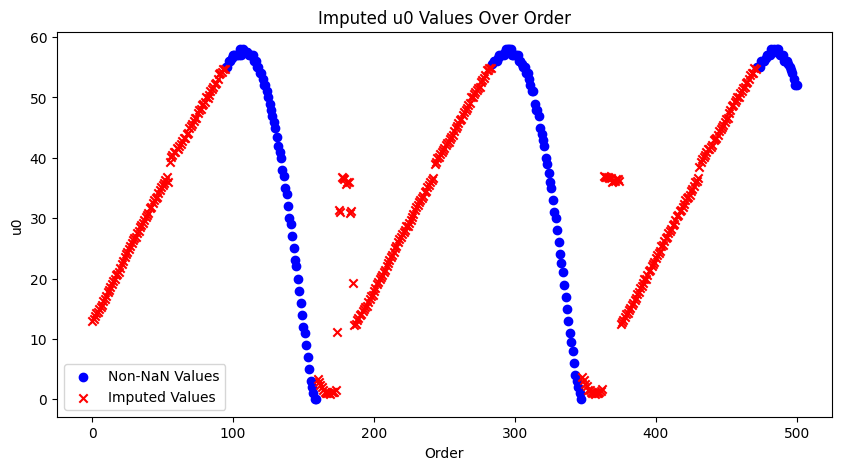

In [28]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(non_nan_order, red_ball_fill.u5, color='blue', label='Non-NaN Values')
plt.scatter(nan_order, y_pred_x, color='red', marker='x', label='Imputed Values')
plt.xlabel('Order')
plt.ylabel('u0')
plt.title('Imputed u0 Values Over Order')
plt.legend()
plt.show()


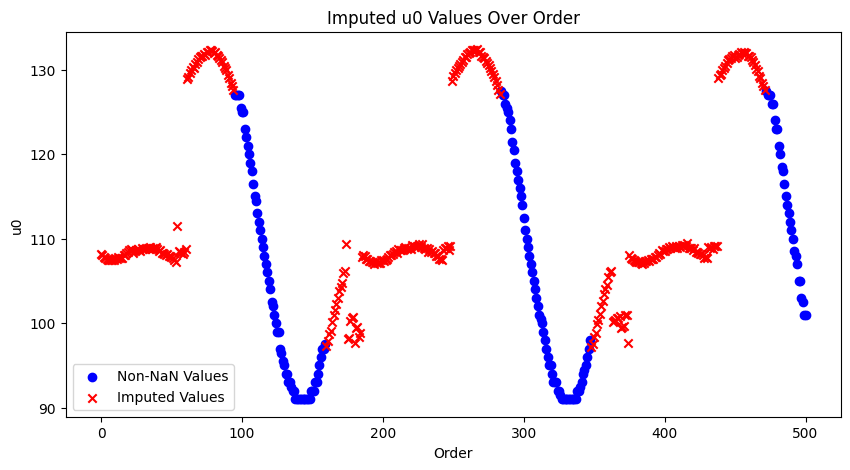

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(non_nan_order, red_ball_fill.v5, color='blue', label='Non-NaN Values')
plt.scatter(nan_order, y_pred_y, color='red', marker='x', label='Imputed Values')
plt.xlabel('Order')
plt.ylabel('u0')
plt.title('Imputed u0 Values Over Order')
plt.legend()
plt.show()


In [30]:
import numpy as np
y_pred = np.column_stack((y_pred_x, y_pred_y))

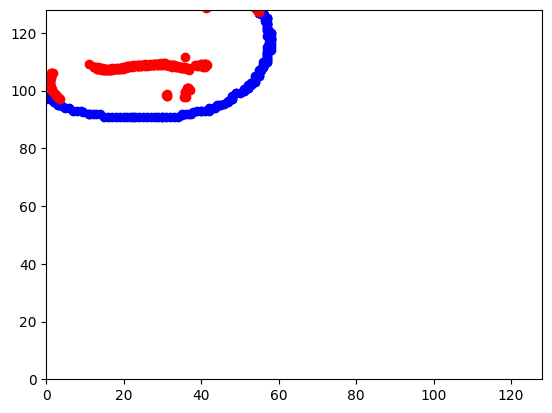

In [31]:
import matplotlib.pyplot as plt

# make a 2d plot with the old values in blue and the new in red
plt.scatter(red_ball_fill.u5, red_ball_fill.v5, color='blue')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color='red')
plt.xlim(0, 128)
plt.ylim(0, 128)
plt.show()